In [1]:
%matplotlib notebook

### Import necessary libraries

In [2]:
from cdasws import CdasWs
import pandas as pd
from cdasws.datarepresentation import DataRepresentation as dr
from IPython.display import Image

import matplotlib.pyplot as plt
cdas = CdasWs()

### 1D data analysis

In [3]:
dataset_name = 'AC_H1_MFI'
variables_in_dataset = cdas.get_variables(dataset_name)
variables_1d = ['Magnitude']
time0 = '2009-06-01T00:00:00Z'
time1 = '2009-07-01T00:20:00Z'
representation = dr.XARRAY

# Get the data
data1d = cdas.get_data(dataset_name, variables_1d,
                    time0, time1, 
                    dataRepresentation=representation)
data1d = data1d[1].to_dataframe().reset_index()

d:\anaconda-envs\polyneme-topst\Lib\site-packages\cdflib\xarray\cdf_to_xarray.py:619: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  created_vars[var_name] = xr.Variable(var_dims, var_data, attrs=var_atts)  # type: ignore[no-untyped-call]


In [4]:
data1d.describe()

,Epoch,Magnitude
count,10806,10806.000000
mean,2009-06-16 00:10:00,4.037633
min,2009-06-01 00:00:00,0.573000
25%,2009-06-08 12:05:00,2.919000
50%,2009-06-16 00:10:00,3.751000
75%,2009-06-23 12:15:00,4.842000
max,2009-07-01 00:20:00,21.542000
std,NaN,1.660763


<IPython.core.display.Javascript object>

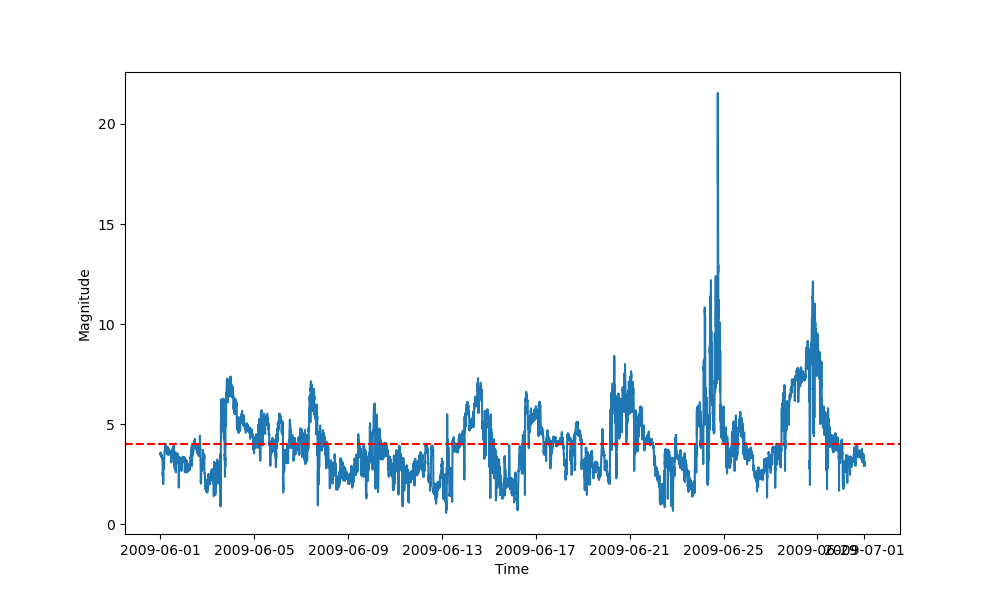

In [5]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(data1d['Epoch'], data1d['Magnitude'])
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude')
# Save the figure
fig.savefig('data1d.png')


# highlight mean in the plot:
mean = data1d['Magnitude'].mean()
ax.axhline(mean, color='r', linestyle='--')
fig.savefig('data1d_mean.png')
Image(filename='data1d_mean.png')


## 3D dataset variables

### Fetch the data from the web

In [6]:
dataset_name = 'AC_H1_MFI'
variables_in_dataset = cdas.get_variables(dataset_name)
print("Variables in dataset: ")
for i in range(len(variables_in_dataset)):
    print(variables_in_dataset[i]['Name'])

## Variables to fetch    
dataset_variables =['SC_pos_GSM','SC_pos_GSE','BGSEc']# [variables_in_dataset[i]['Name'] for i in range(len(variables_in_dataset))]

time0 = '2009-06-01T00:00:00Z'
time1 = '2009-07-01T00:20:00Z'
representation = dr.XARRAY

data = cdas.get_data(dataset_name, dataset_variables,
                    time0, time1, 
                    dataRepresentation=representation)

if data[0]['http']['status_code'] != 200:
    print(data[0]['http']['status_code'])



Variables in dataset: 
Magnitude
BGSEc
BGSM
SC_pos_GSE
SC_pos_GSM


d:\anaconda-envs\polyneme-topst\Lib\site-packages\cdflib\xarray\cdf_to_xarray.py:619: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  created_vars[var_name] = xr.Variable(var_dims, var_data, attrs=var_atts)  # type: ignore[no-untyped-call]


### Read the data into a pandas dataframe

In [7]:
data_df = data[1].to_dataframe()
data_df

SC_pos_GSM  SC_pos_GSE  BGSEc   metavar0  \
Epoch               cartesian                                               
2009-06-01 00:00:00 x_component   1447795.0   1442197.0 -0.106  ACE X-GSM   
                    y_component   -169097.0   -143239.0  2.521  ACE Y-GSM   
                    z_component     12358.0     66309.0 -2.391  ACE Z-GSM   
2009-06-01 00:04:00 x_component   1447795.0   1442191.0 -0.412  ACE X-GSM   
                    y_component   -169097.0   -143219.0  2.402  ACE Y-GSM   
...                                     ...         ...    ...        ...   
2009-07-01 00:16:00 y_component     78172.0    118921.0  0.780  ACE Y-GSM   
                    z_component    140976.0    148881.0  0.828  ACE Z-GSM   
2009-07-01 00:20:00 x_component   1438602.0   1438022.0  2.801  ACE X-GSM   
                    y_component     78172.0    118943.0  1.260  ACE Y-GSM   
                    z_component    140976.0    148882.0  0.126  ACE Z-GSM   

                                  metavar1 metavar2  
Epoch               cartesian                        
2009-06-01 00:00:00 x_component  ACE X-GSE   Bx GSE  
                    y_component  ACE Y-GSE   By GSE  
                    z_component  ACE Z-GSE   Bz GSE  
2009-06-01 00:04:00 x_component  ACE X-GSE   Bx GSE  
                    y_component  ACE Y-GSE   By GSE  
...                                    ...      ...  
2009-07-01 00:16:00 y_component  ACE Y-GSE   By GSE  
                    z_component  ACE Z-GSE   Bz GSE  
2009-07-01 00:20:00 x_component  ACE X-GSE   Bx GSE  
                    y_component  ACE Y-GSE   By GSE  
                    z_component  ACE Z-GSE   Bz GSE  

[32418 rows x 6 columns]

In [8]:
df = data_df.unstack(level=1)
df.columns = ['_'.join(col) for col in df.columns]
df = df.reset_index()
df

,Epoch,SC_pos_GSM_x_component,SC_pos_GSM_y_component,SC_pos_GSM_z_component,SC_pos_GSE_x_component,SC_pos_GSE_y_component,SC_pos_GSE_z_component,BGSEc_x_component,BGSEc_y_component,BGSEc_z_component,metavar0_x_component,metavar0_y_component,metavar0_z_component,metavar1_x_component,metavar1_y_component,metavar1_z_component,metavar2_x_component,metavar2_y_component,metavar2_z_component
0,2009-06-01 00:00:00,1447795.0,-169097.0,12358.0,1442197.0,-143239.0,66309.0,-0.106,2.521,-2.391,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
1,2009-06-01 00:04:00,1447795.0,-169097.0,12358.0,1442191.0,-143219.0,66322.0,-0.412,2.402,-2.449,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
2,2009-06-01 00:08:00,1447795.0,-169097.0,12358.0,1442186.0,-143199.0,66335.0,-0.094,2.309,-2.587,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
3,2009-06-01 00:12:00,1447795.0,-169097.0,12358.0,1442180.0,-143178.0,66348.0,0.374,2.803,-1.841,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
4,2009-06-01 00:16:00,1447795.0,-169097.0,12358.0,1442174.0,-143158.0,66362.0,0.871,3.099,-1.563,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,2009-07-01 00:04:00,1438602.0,78172.0,140976.0,1438021.0,118856.0,148881.0,2.737,0.904,-0.728,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
10802,2009-07-01 00:08:00,1438602.0,78172.0,140976.0,1438021.0,118878.0,148881.0,2.682,0.851,-0.732,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
10803,2009-07-01 00:12:00,1438602.0,78172.0,140976.0,1438022.0,118899.0,148881.0,2.871,0.808,0.168,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE
10804,2009-07-01 00:16:00,1438602.0,78172.0,140976.0,1438022.0,118921.0,148881.0,2.904,0.780,0.828,ACE X-GSM,ACE Y-GSM,ACE Z-GSM,ACE X-GSE,ACE Y-GSE,ACE Z-GSE,Bx GSE,By GSE,Bz GSE


In [9]:
# map Epoch to categorical and get cat.codes
df['time_int'] = pd.Categorical(df['Epoch']).codes

### 3D scatter plot with Time as the color dimension

<IPython.core.display.Javascript object>

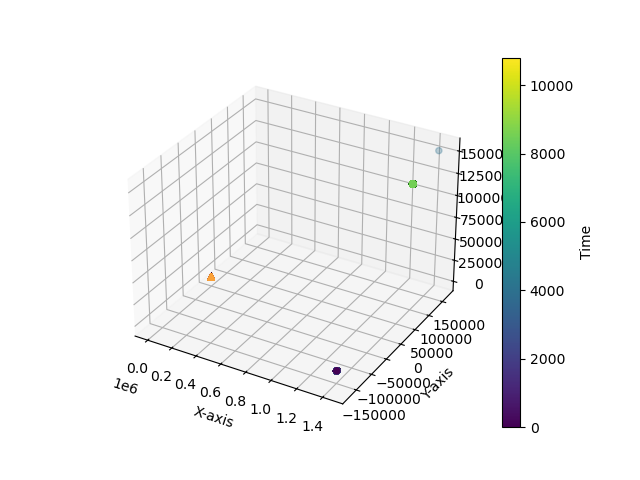

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate sample 4D data (x, y, z, time)
np.random.seed(0)
num_points = 100
x = df['SC_pos_GSM_x_component']
y = df['SC_pos_GSM_y_component']
z = df['SC_pos_GSM_z_component']
time = df['time_int'] # Replace this with your actual time data

# Create a 3D scatter plot with time represented by color
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=time, cmap='viridis')

# Add one more scatter plot with a different color map:
x2 = df['SC_pos_GSE_x_component']
y2 = df['SC_pos_GSE_y_component']
z2 = df['SC_pos_GSE_z_component']
time2 = df['time_int']
scatter2 = ax.scatter(x2, y2, z2, c=time2, cmap='plasma', marker='', alpha=0.5)

## 
x3 = df['BGSEc_x_component']
y3 = df['BGSEc_y_component']
z3 = df['BGSEc_z_component']
time3 = df['time_int']
scatter3 = ax.scatter(x3, y3, z3, c=time3, cmap='plasma', marker='^', alpha=0.5)


# Add colorbar to indicate time
cbar = plt.colorbar(scatter)
cbar.set_label('Time')

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Save the plot as an image file
plt.savefig('3D_plot_with_time.png')

# Show the plot
# plt.show()

# Show from the saved file:
Image(filename='3D_plot_with_time.png')
